# Lab6 - Clustering

## 2.1 Preprocess the raw data

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

# Load dataset
data = np.genfromtxt('heart.csv', delimiter=',', skip_header=1, filling_values=np.nan)

# Handle missing values by removing rows with NaN
data = data[~np.isnan(data).any(axis=1)]

#Check whether there are cateogrical features
# Extract X and y from the data
X = data[:, :-1] 
y = data[:, -1]  

# Check for categorical features
categorical_features = []
for i in range(X.shape[1]):
    unique_values = np.unique(X[:, i])
    if np.all(np.mod(unique_values, 1) == 0):  # Check if all unique values are integers
        categorical_features.append(i)

if categorical_features:
    print("Categorical features found in columns:", categorical_features)
else:
    print("No categorical features found.")

Categorical features found in columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]


## 2.2 Partition the dataset with K-means and compute its NMI

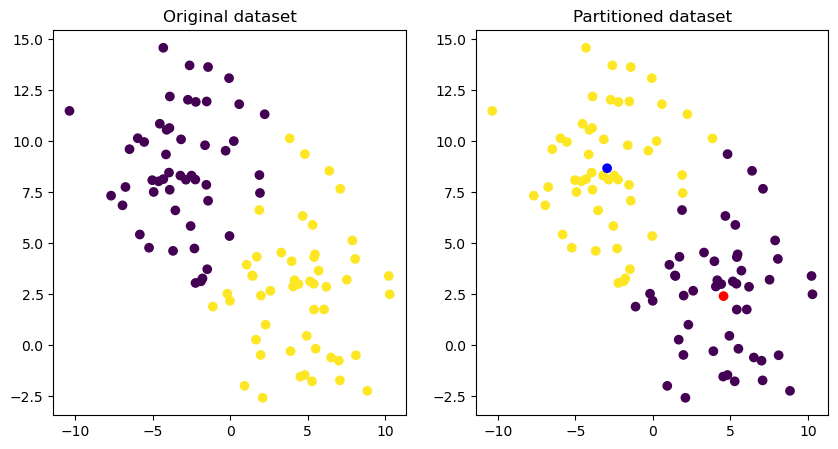

The normalized mutual information score of the K-means method is 0.9291


In [7]:
# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)

#first method using K-means
cluster = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

#second method using NMI
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

## 2.3 Partition the dataset with Agglomerative method and compute its NMI

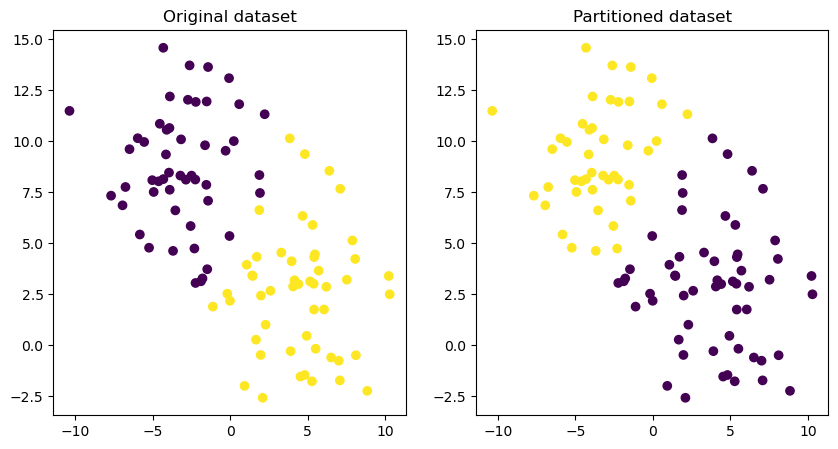

The normalized mutual information score of the Agglomerative method  is 0.6987


In [8]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))